# Scraping tweets

In [1]:
import tweepy
import pandas as pd

def scraping_tweet(query,max_tweets):
    consumer_key='aM2VPiZE2RLfV8uQRcVQ2V0O6'
    consumer_secret='tkbNu0EaYemxr96OGYPLXpR9hEVNQNv2QK6qu3MqleFJGCryGK'
    access_token='1412618647252529156-JELI0jUP2mmKsOz3iPRa8yszgWYHIc'
    access_token_secret='H1NaJajXB2i2VVOgQdRGMLCRf0LJUldhxzoFZCQmFXGJz'
    auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
    api=tweepy.API(auth,wait_on_rate_limit=True)
    text_query=query
    language ='id'
    max_tweets = max_tweets
    text_query=query
    language ='id'
    max_tweets = max_tweets
    tweets=tweepy.Cursor(api.search_tweets,q=text_query,lang=language,
                         tweet_mode='extended').items(max_tweets)
    data = [[tweet.id_str,tweet.created_at,tweet.full_text,
             tweet.retweet_count,tweet.favorite_count,tweet.user.id_str,
             tweet.user.screen_name,tweet.user.followers_count,tweet.user.location] for tweet in tweets]
    df = pd.DataFrame(data, columns = ['tweet_id','timestamp', 'tweet','retweet_count',
                                       'favorite_count','user_id','username','followers','location'])
    return(df)

In [2]:
df_hpp = scraping_tweet(query="uu hpp -filter:retweets",max_tweets=2000)
df_nik = scraping_tweet(query="nik npwp -filter:retweets",max_tweets=2000)
df_ppn = scraping_tweet(query="ppn hpp -filter:retweets",max_tweets=1000)
df_pph = scraping_tweet(query="pph hpp -filter:retweets",max_tweets=1000)
df_karbon = scraping_tweet(query="pajak karbon hpp -filter:retweets",max_tweets=1000)
df_tax = scraping_tweet(query="tax amnesty hpp -filter:retweets",max_tweets=1000)

<b> Number of tweet:

In [28]:
print(df_hpp.shape[0]+df_nik.shape[0]+df_ppn.shape[0]+df_pph.shape[0]+df_karbon.shape[0]+df_tax.shape[0],'tweets')

2868 tweets


# Data Preprocessing

<b> Drop redundant tweet 

In [71]:
df = pd.concat([df_hpp, df_nik,df_ppn,df_pph,df_karbon,df_tax]).drop_duplicates(subset ="tweet_id").reset_index(drop=True)

In [72]:
df.shape

(2453, 9)

In [73]:
df['timestamp'] = df['timestamp'].dt.tz_localize(None)

In [43]:
df.to_excel('tweet hpp.xlsx',index=False)

<b> Drop non indonesian tweet

In [74]:
from langdetect import detect
df['language'] = df['tweet'].apply(detect)

In [75]:
pd.set_option('display.max_colwidth', None)
df[df['language']!='id']

,tweet_id,timestamp,tweet,retweet_count,favorite_count,user_id,username,followers,location,language
270,1447821557405868032,2021-10-12 07:08:53,#SaveBrigJenJunior \n#SaveBrigJenJunior \nBaim \nSelasa \nKlepon \nSeminar Nasional \nUU HPP \nProfesor https://t.co/9UwJXNawgy,0,1,1406696255917412353,Toni17250685,2023,"Medan Baru, Indonesia",en
303,1447793482014158849,2021-10-12 05:17:19,Bagaimana ketentuan NIK dan NPWP di UU HPP?\n\nSimak di infografis berikut.\n--\nWhat are the new rules for ID card number and TIN in the UU HPP?\n\nCheck out the following infographic.\n\n#PajakBerkeadilan\n#UUHPP https://t.co/kOrOZyqKg6,0,0,891871861797027841,pajakgnsitoli,57,Jl. Pancasila No.18 Desa Mudik,en
338,1447766299531165697,2021-10-12 03:29:18,Bagaimana ketentuan NIK dan NPWP di UU HPP? \n\nSimak di infografis berikut.\n--\nWhat are the new rules for ID card number and TIN in the UU HPP?\n\nCheck out the following infographic.\n\n#PajakBerkeadilan\n#UUHPP https://t.co/9yBlViB9F0,0,0,832846868933603328,pajakperdagangn,138,"Simalungun, Sumatera Utara",en
377,1447747003820118020,2021-10-12 02:12:38,Bagaimana ketentuan NIK dan NPWP di UU HPP?\n\nSimak di infografis berikut. \n\n--\n\nWhat are the new rules for ID card number and TIN in the UU HPP?\n\nCheck out the following infographic.\n\n#PajakBerkeadilan\n#UUHPP https://t.co/MG4oLQDGYj,0,0,2676045007,pajakmartapura,204,Jl. A. Yani No.23 Martapura,en
384,1447740199497129985,2021-10-12 01:45:35,Bagaimana ketentuan NIK dan NPWP di UU HPP?\n\nSimak di infografis berikut.\n--\nWhat are the new rules for ID card number and TIN in the UU HPP?\n\nCheck out the following infographic.\n\n#PajakBerkeadilan\n#UUHPP https://t.co/EiCLk6oL0r,0,0,920167436468420609,pajakdumai,208,"Kota Dumai, Riau",en
390,1447735926927474697,2021-10-12 01:28:37,#PPKMSuksesTurunkanCovid\n☀⛅☁☁☁⛅☀\n🌸🌷🌺🌼🌺🌷🌸\nUU HPP PERKUAT sistem\n🌺 🌼 🌺\n🌷 🌹 \n🌻 🌷 🌻\n🌸 🍀 🌸\nPERPAJAKAN\n🌷🌺🌼🌺🌷🌸\n☀⛅☁☁☁⛅☀\n#PPKMSuksesTurunkanCovid https://t.co/qgJX3dxx0W,0,0,1371671935013122050,nyananan36,76,,fi
391,1447735881717088259,2021-10-12 01:28:26,#PPKMSuksesTurunkanCovid\n☀⛅☁☁☁⛅☀\n🌸🌷🌺🌼🌺🌷🌸\nUU HPP PERKUAT sistem\n🌺 🌼 🌺\n🌷 🌹 \n🌻 🌷 🌻\n🌸 🍀 🌸\nPERPAJAKAN\n🌷🌺🌼🌺🌷🌸\n☀⛅☁☁☁⛅☀\n#PPKMSuksesTurunkanCovid https://t.co/Eb7ATDnqwF,0,0,1436715042364289028,Bougenvile105,10,,fi
409,1447726828852940801,2021-10-12 00:52:28,Bagaimana ketentuan NIK dan NPWP di UU HPP? \n\nSimak di infografis berikut.\n--\nWhat are the new rules for ID card number and TIN in the UU HPP?\n\nCheck out the following infographic.\n\n#PajakBerkeadilan\n#UUHPP https://t.co/17Q3az7Dsw,0,0,3106339634,pajakmojosari,287,"Mojokerto, Indonesia",en
488,1447545247895019525,2021-10-11 12:50:55,Bagaimana ketentuan NIK dan NPWP di UU HPP? \n\nSimak di infografis berikut.\n--\nWhat are the new rules for ID card number and TIN in the UU HPP?\n\nCheck out the following infographic.\n\n#PajakBerkeadilan\n#UUHPP https://t.co/TcHVq9JRzc,0,0,3332833694,pajakrimbaraya,296,"Kab.Bener Meriah, Aceh",en
493,1447537418345746445,2021-10-11 12:19:49,Bagaimana ketentuan NIK dan NPWP di UU HPP?\n\nSimak di infografis berikut.\n--\nWhat are the new rules for ID card number and TIN in the UU HPP?\n\nCheck out the following infographic.\n\n#PajakBerkeadilan\n#UUHPP https://t.co/NLQmzywQnk,0,0,996773783829602304,PajakTarutung,65,,en


In [76]:
df = df[df['language']=='id']
df.shape

(2413, 10)

<b> Remove emoji,mention, hastag, url,number, punctuation, newline

In [77]:
df = df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

In [79]:
def pra_proses(data):
    #convert to lowercase
    data=data.str.lower()
    #remove url
    import re
    data = data.replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
    #remove newline
    data=data.replace(r'\n',' ', regex=True)
    #remove hastag
    data=data.replace(r'#\S+', '', regex=True)
    #remove mention
    data=data.replace(r'@\S+', '', regex=True)
    #remove whitespace
    data=data.str.strip()
    #menghilangkan angka
    data=data.str.replace('\d+', ' ')
    #menghapus tanda baca
    data=data.str.replace('[^\w\s]',' ')
    #menghilangkan multiple space
    data=data.replace('\s+', ' ', regex=True)
    return(data)
df['tweet_clean'] = pra_proses(df['tweet'])

In [80]:
df[['tweet','tweet_clean']].head()

,tweet,tweet_clean
0,"UU HPP ini memperbarui beberapa aturan perpajakan yang berlaku di Indonesia. Mulai dari pengaturan tarif PPh, sampai program pengampunan pajak.\n\nSelengkapnya:\nhttps://t.co/t85rAYzjhz https://t.co/3AUHXEhtE0",uu hpp ini memperbarui beberapa aturan perpajakan yang berlaku di indonesia mulai dari pengaturan tarif pph sampai program pengampunan pajak selengkapnya
1,Nomor NPWP akan digabung dengan Nomor Induk Kependudukan (NIK) KTP?\n\nKebijakan ini merupakan salah satu aturan dalam Undang-Undang Harmonisasi Peraturan Perpajakan (UU HPP) yang telah disahkan pada 7 Oktober lalu. https://t.co/xS6GoeQ44T,nomor npwp akan digabung dengan nomor induk kependudukan nik ktp kebijakan ini merupakan salah satu aturan dalam undang undang harmonisasi peraturan perpajakan uu hpp yang telah disahkan pada oktober lalu
2,"Lindungi Mafia Pajak, UU HPP Pro Oligarki https://t.co/q66KqkcNlD\nCovid-19\nRabu 13 Oktober 2021\nAda 4.231.046\n142.811 Meninggal\nBRIN\nDaniel\nBabah\nIdamanmu\nMoney\nPolisi\nBiadab\nSmackdown\nUndertaker\nJohn Cena\nDenmark\n#NegeriPajak\n#NegeriPajak",lindungi mafia pajak uu hpp pro oligarki covid rabu oktober ada meninggal brin daniel babah idamanmu money polisi biadab smackdown undertaker john cena denmark
3,Tahu nggak kalau ada perubahan lapisan penghasilan untuk pengenaan tarif Pajak Penghasilan Orang Pribadi di dalam UU HPP?\n\nPerubahan ini untuk melindungi masyarakat menengah ke bawah dan memberikan sisi keadilan.\n\nLebih lengkapnya ada di infografis berikut.\n\n#PajakBerkeadilan https://t.co/NCXpxoP5Jr,tahu nggak kalau ada perubahan lapisan penghasilan untuk pengenaan tarif pajak penghasilan orang pribadi di dalam uu hpp perubahan ini untuk melindungi masyarakat menengah ke bawah dan memberikan sisi keadilan lebih lengkapnya ada di infografis berikut
4,Tahu enggak kalau ada perubahan lapisan (bracket) penghasilan untuk pengenaan tarif Pajak Penghasilan Orang Pribadi di dalam UU HPP? https://t.co/BQU5eTo2FP,tahu enggak kalau ada perubahan lapisan bracket penghasilan untuk pengenaan tarif pajak penghasilan orang pribadi di dalam uu hpp


# Sentiment polarity

<b> Translate tweet to english

In [256]:
df = pd.read_excel('t.xlsx')

In [257]:
from textblob import TextBlob
df['polarity'] = df.translation.apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [258]:
df.loc[df['polarity'] == 0, 'sentiment']='netral'
df.loc[df['polarity'] > 0, 'sentiment']='positif'
df.loc[df['polarity'] < 0, 'sentiment']='negatif'

In [259]:
df['sentiment'].value_counts()

netral     1155
positif     974
negatif     284
Name: sentiment, dtype: int64

<b> Word Normalization

In [260]:
normalizad_word = pd.read_excel('slang words.xlsx')
normalizad_word_dict = {}
for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]
d2 = {r'(\b){}(\b)'.format(k):r'\1{}\2'.format(v) for k,v in normalizad_word_dict.items()}
df['tweet_clean'] = df['tweet_clean'].replace(d2, regex=True)

<b> Remove Stopwords

In [261]:
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
df['tweet_clean'] = df['tweet_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# Word Cloud for Each Sentiment

<b> Positive sentiment

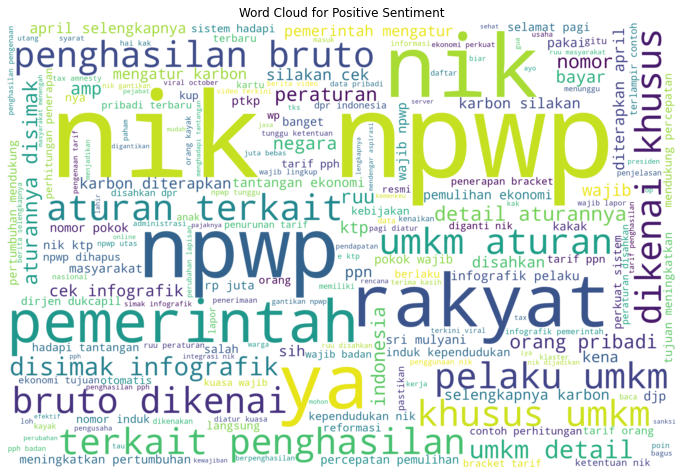

In [271]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

remove_words=['pajak','hpp','uu','harmonisasi','perpajakan']
pat = r'\b(?:{})\b'.format('|'.join(remove_words))
data = df[df['sentiment']=='positif']['tweet_clean'].str.replace(pat, '')
data_cloud=' '.join(data)
wordcloud=WordCloud(width=3000,height=2000,background_color='white').generate(data_cloud)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment')
plt.axis('off')
plt.show()

In [270]:
remove_words=['pajak','hpp','uu','harmonisasi','perpajakan']
pat = r'\b(?:{})\b'.format('|'.join(remove_words))
data = df[df['sentiment']=='positif']['tweet_clean'].str.replace(pat, '')
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(data, 30)
df2 = pd.DataFrame(common_words, columns = ['tweet' , 'count'])
df2.groupby('tweet').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 30 words in tweet after removing stop words')

<b> Negative sentiment

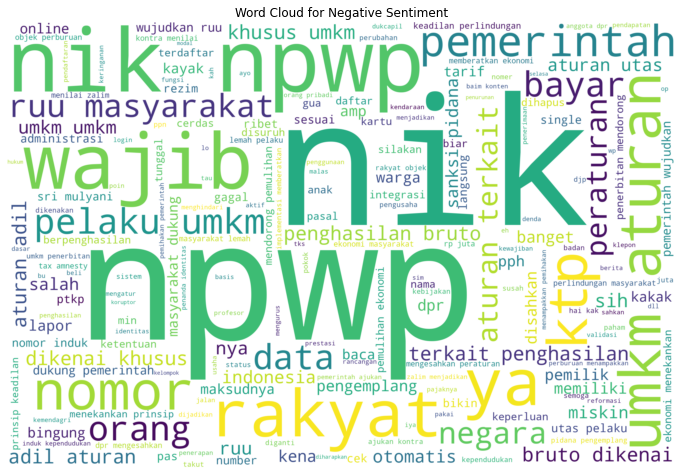

In [272]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

remove_words=['pajak','hpp','uu','harmonisasi','perpajakan']
pat = r'\b(?:{})\b'.format('|'.join(remove_words))
data = df[df['sentiment']=='negatif']['tweet_clean'].str.replace(pat, '')
data_cloud=' '.join(data)
wordcloud=WordCloud(width=3000,height=2000,background_color='white').generate(data_cloud)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment')
plt.show()

In [275]:
remove_words=['pajak','hpp','uu','harmonisasi','perpajakan']
pat = r'\b(?:{})\b'.format('|'.join(remove_words))
data = df[df['sentiment']=='negatif']['tweet_clean'].str.replace(pat, '')
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(data, 30)
df2 = pd.DataFrame(common_words, columns = ['tweet' , 'count'])
df2.groupby('tweet').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 30 words in tweet after removing stop words')

<b> Neutral Sentiment 

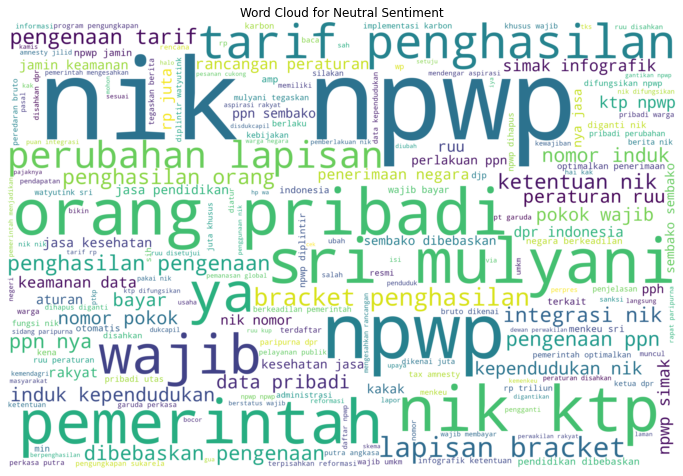

In [277]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

remove_words=['pajak','hpp','uu','harmonisasi','perpajakan']
pat = r'\b(?:{})\b'.format('|'.join(remove_words))
data = df[df['sentiment']=='netral']['tweet_clean'].str.replace(pat, '')
data_cloud=' '.join(data)
wordcloud=WordCloud(width=3000,height=2000,background_color='white').generate(data_cloud)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Neutral Sentiment')
plt.show()

In [276]:
remove_words=['pajak','hpp','uu','harmonisasi','perpajakan']
pat = r'\b(?:{})\b'.format('|'.join(remove_words))
data = df[df['sentiment']=='netral']['tweet_clean'].str.replace(pat, '')
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(data, 30)
df2 = pd.DataFrame(common_words, columns = ['tweet' , 'count'])
df2.groupby('tweet').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 30 words in tweet after removing stop words')

<b> Stemming

In [139]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [140]:
df['tweet_clean'] = [stemmer.stem(kata) for kata in df['tweet_clean']]

In [141]:
df.tweet_id = df.tweet_id.apply(str)
df.user_id = df.user_id.apply(str)

In [142]:
df.to_excel('hpp_clean.xlsx',index=False)

# Modelling

In [4]:
df = pd.read_excel('hpp_clean.xlsx')

In [5]:
df.loc[df['sentiment'] == 'netral', 'sentiment']=0
df.loc[df['sentiment'] == 'positif', 'sentiment']=1
df.loc[df['sentiment'] == 'negatif', 'sentiment']=-1
df['sentiment']=df['sentiment'].astype('int')

<b> Bernoulli Naive Bayes

In [6]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2),binary=True,max_features=450)
X = vectorizer.fit_transform(df['tweet_clean'])
y = df['sentiment']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000/3000, random_state=40,stratify=y)

In [7]:
import numpy as np
from sklearn.model_selection import GridSearchCV,cross_val_score,RepeatedStratifiedKFold
new_params = {
    'alpha':np.logspace(0,-6,200)
}
model = BernoulliNB()
from sklearn.metrics import make_scorer , f1_score
f1 = make_scorer(f1_score, average='macro')
cv=RepeatedStratifiedKFold(n_repeats=3,n_splits=5)
gscv = GridSearchCV(model,param_grid = new_params,scoring=f1,
                    cv=cv,return_train_score=True)


gscv.fit(X_train,y_train)
pd.set_option('display.max_columns', None)
df_gridsearch = pd.DataFrame(gscv.cv_results_)
param = df_gridsearch['params']
coba = df_gridsearch.copy()
n = len(coba) 
coba = coba.sort_values('mean_test_score',ascending=False).head(int(n/4))
n = len(coba) 
coba = coba.sort_values('std_test_score',ascending=False).head(int(n/2))
coba[['param_alpha','mean_test_score','std_test_score',
      'rank_test_score','mean_train_score']].head(5)

,param_alpha,mean_test_score,std_test_score,rank_test_score,mean_train_score
26,0.164468,0.541491,0.036652,42,0.645134
28,0.143146,0.542181,0.036505,29,0.645335
33,0.101164,0.543421,0.036350,10,0.647259
27,0.153437,0.542420,0.036310,24,0.644944
35,0.0880488,0.542918,0.036226,15,0.648171


In [8]:
clf = BernoulliNB(alpha=0.031129)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred,target_names=['negatif','netral','positif']))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

     negatif       0.30      0.59      0.40        95
      netral       0.73      0.76      0.75       385
     positif       0.79      0.52      0.62       324

    accuracy                           0.64       804
   macro avg       0.60      0.62      0.59       804
weighted avg       0.70      0.64      0.65       804

[[ 56  28  11]
 [ 57 294  34]
 [ 75  82 167]]
